# Working with Multi-Human Synthesis AI Datasets

First, we install `synthesisai` and download test datasets.

In [ ]:
%%bash
python -m pip install synthesisai
curl https://synthesisai-example-datasets.s3.amazonaws.com/scenarios_api_example_dataset.zip -o scenarios_api_example_dataset.zip
unzip scenarios_api_example_dataset.zip -d scenarios_api_example_dataset

Now we add some imports for the visualisation.

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

We use `SaiDataset` class to access synthesis datasets.

In [3]:
from synthesisai import SaiDataset, Modality

In [4]:
# data_root = "scenarios_api_example_dataset"
data_root = "/Users/anish/Downloads/full_output"
dataset = SaiDataset(data_root)

Ignoring unsupported modality Modality.CLOTHING_SEGMENTATION
Ignoring unsupported modality Modality.LANDMARKS_CONTOUR_IBUG68
Ignoring unsupported modality Modality.FACIAL_HAIR
Ignoring unsupported modality Modality.LANDMARKS_3D_MEDIAPIPE_FACE
Ignoring unsupported modality Modality.LANDMARKS_3D_SAI
Ignoring unsupported modality Modality.LANDMARKS_MEDIAPIPE_FACE
Ignoring unsupported modality Modality.LANDMARKS_SAI


In [5]:
len(dataset)

1

In [6]:
item = dataset[0]

Each item is a dict with different modalities as keys.

In [7]:
item.keys()

dict_keys([<Modality.SCENE_ID: 1>, <Modality.RGB: 2>, <Modality.NORMALS: 3>, <Modality.DEPTH: 4>, <Modality.BODY_SEGMENTATION: 5>, <Modality.INSTANCE_SEGMENTATION: 7>, <Modality.LANDMARKS_IBUG68: 8>, <Modality.LANDMARKS_KINECT_V2: 10>, <Modality.LANDMARKS_MEDIAPIPE: 11>, <Modality.LANDMARKS_COCO: 12>, <Modality.LANDMARKS_MPEG4: 13>, <Modality.LANDMARKS_3D_IBUG68: 14>, <Modality.LANDMARKS_3D_KINECT_V2: 15>, <Modality.LANDMARKS_3D_MEDIAPIPE: 16>, <Modality.LANDMARKS_3D_COCO: 17>, <Modality.LANDMARKS_3D_MPEG4: 18>, <Modality.PUPILS: 19>, <Modality.PUPILS_3D: 20>, <Modality.IDENTITY: 21>, <Modality.IDENTITY_METADATA: 22>, <Modality.HAIR: 23>, <Modality.EXPRESSION: 25>, <Modality.GAZE: 26>, <Modality.FACE_BBOX: 27>, <Modality.HEAD_TO_CAM: 28>, <Modality.CAM_TO_HEAD: 29>, <Modality.HEAD_TO_WORLD: 30>, <Modality.WORLD_TO_HEAD: 31>, <Modality.CAM_TO_WORLD: 32>, <Modality.WORLD_TO_CAM: 33>, <Modality.CAM_INTRINSICS: 34>, <Modality.CAMERA_NAME: 35>, <Modality.FRAME_NUM: 36>])

`RGB` modality is the rendered image.

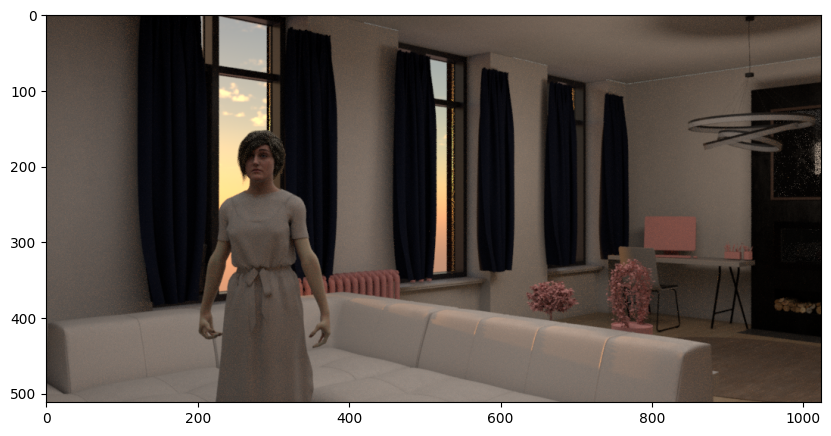

In [8]:
plt.figure(figsize=(10,10))
plt.imshow(item[Modality.RGB])

The segmentation modalities provide a single semantic segmentation map for the entire image, which includes all the humans.

In [9]:
def discrete_show(data):
    cmap = plt.get_cmap('RdBu', np.max(data) - np.min(data) + 1)
    plt.imshow(data, cmap=cmap, vmin=np.min(data) - .5,
               vmax = np.max(data) + .5, interpolation="nearest")

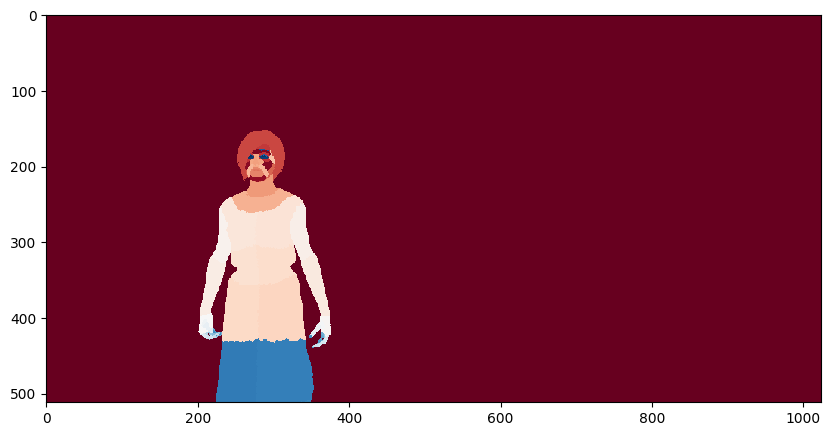

In [10]:
plt.figure(figsize=(10,10))
discrete_show(item[Modality.BODY_SEGMENTATION])

There is also an `INSTANCE_SEGMENTATION` modality to let you figure out which pixels belong to which human.

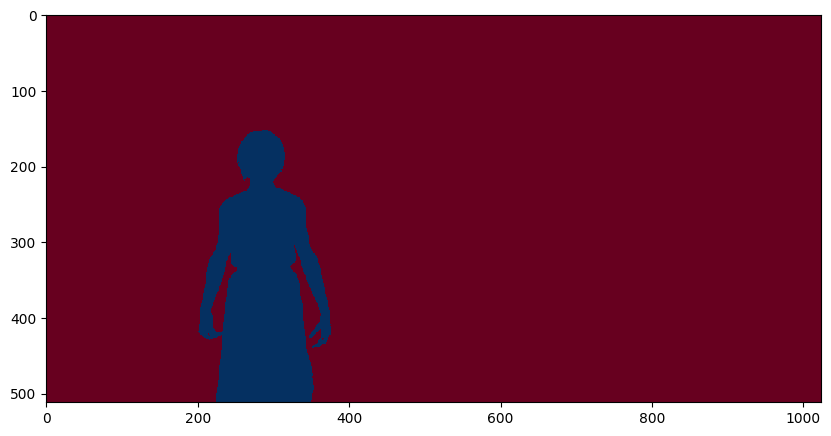

In [11]:
plt.figure(figsize=(10,10))
discrete_show(item[Modality.INSTANCE_SEGMENTATION])

We can combine the instance segmentation map with another segmentation map (eg. body segmentation) to produce a segmentation map for a specific human.

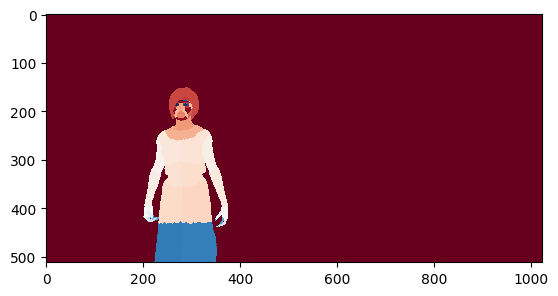

In [12]:
# let's get the body segmentation for the human with instance id = 2
human_instance_id = 1

body_segmentation = item[Modality.BODY_SEGMENTATION]
instance_segmentation = item[Modality.INSTANCE_SEGMENTATION]

instance_1_body_segmentation = body_segmentation.copy()
# set all pixels that don't correspond to human 2 to the background class
instance_1_body_segmentation[instance_segmentation != human_instance_id] = SaiDataset.BODY_SEGMENTATION_MAPPING["background"]
discrete_show(instance_1_body_segmentation)

We can also get the face bounding boxes for all the humans in a given image

In [13]:
def plot_bboxes(image, face_bboxes):
    plt.figure(figsize=(10,10))

    for face_bbox in face_bboxes:
        image = cv2.rectangle(image.copy(), face_bbox[:2], face_bbox[2:], (255, 0, 0), 2)
    plt.imshow(image)

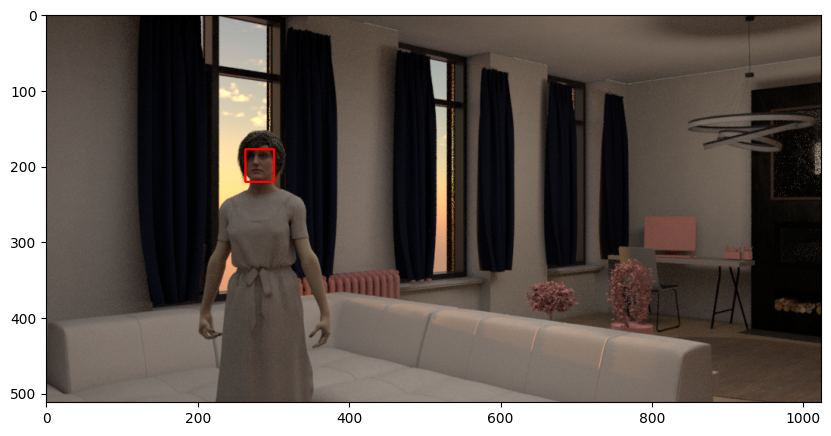

In [15]:
face_bboxes = []
for human_instance_id, face_bbox in item[Modality.FACE_BBOX].items():
    face_bboxes.append(face_bbox)
plot_bboxes(item[Modality.RGB], face_bboxes)